Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

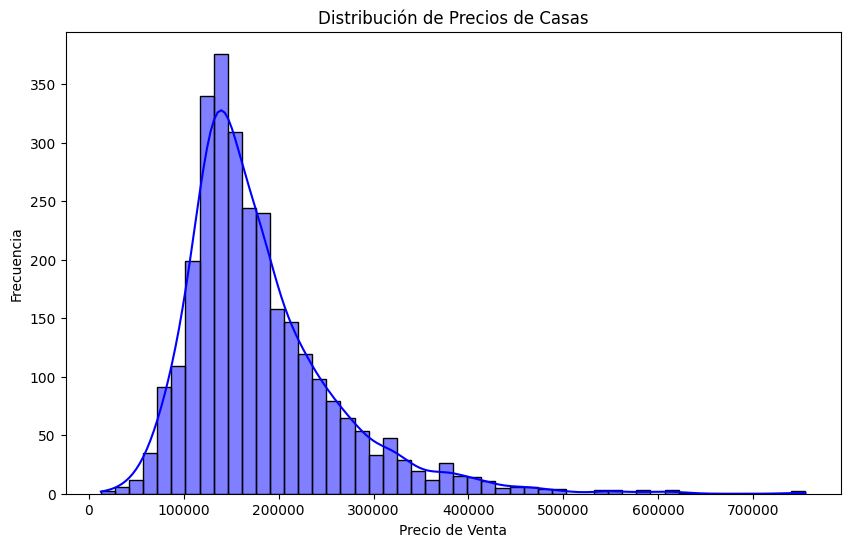

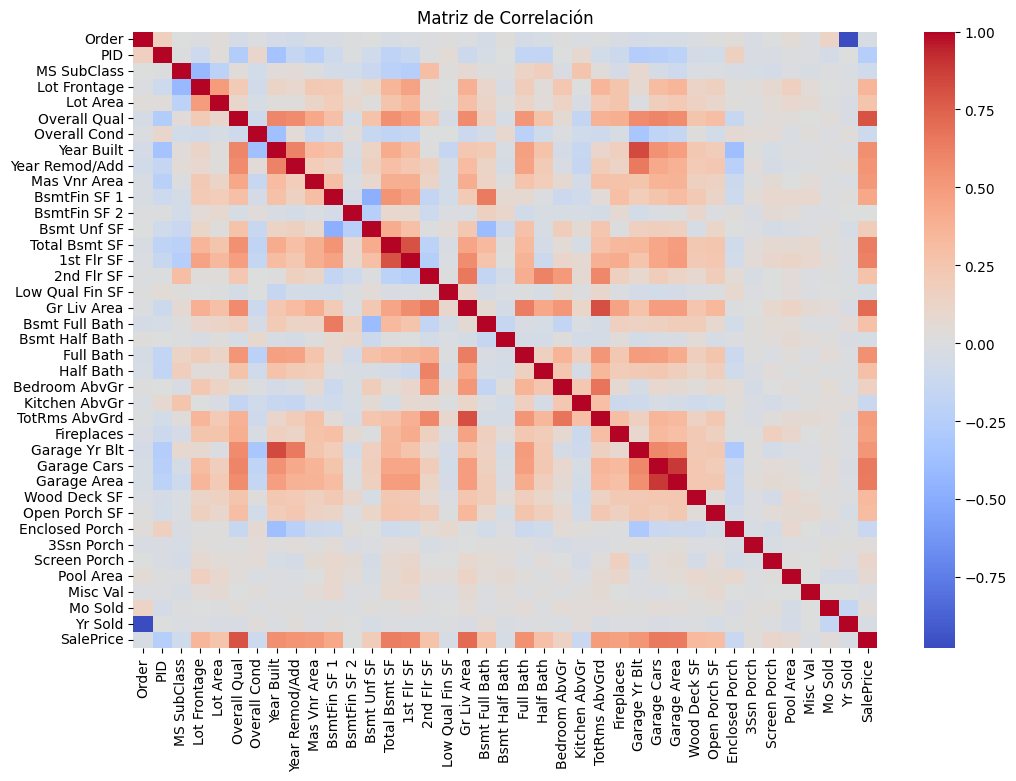

Random Forest - MAE: 16260.68
Random Forest - RMSE: 27174.40
Random Forest - R²: 0.91
XGBoost - MAE: 15598.94
XGBoost - RMSE: 25567.68
XGBoost - R²: 0.92


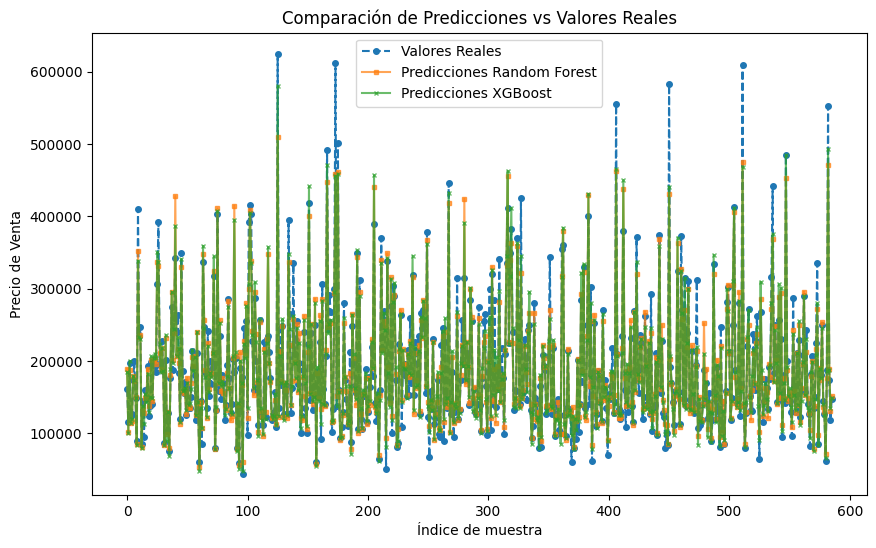

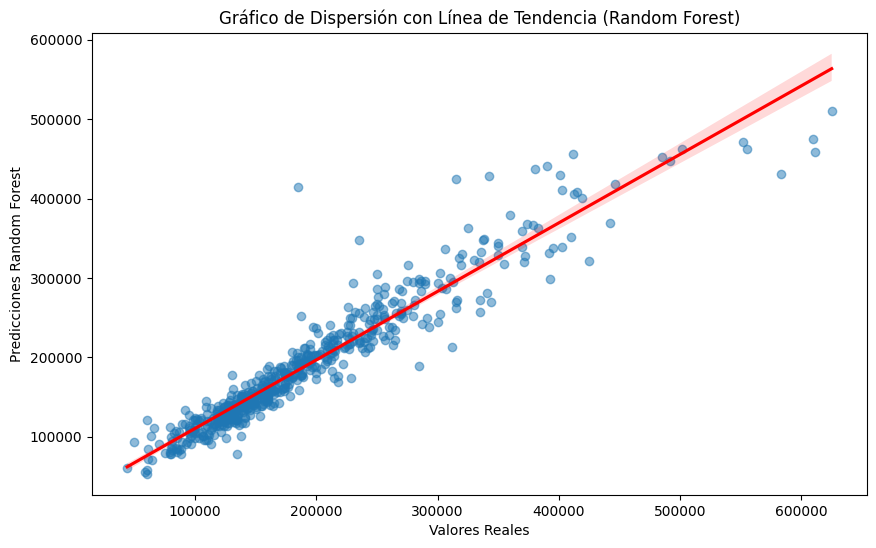

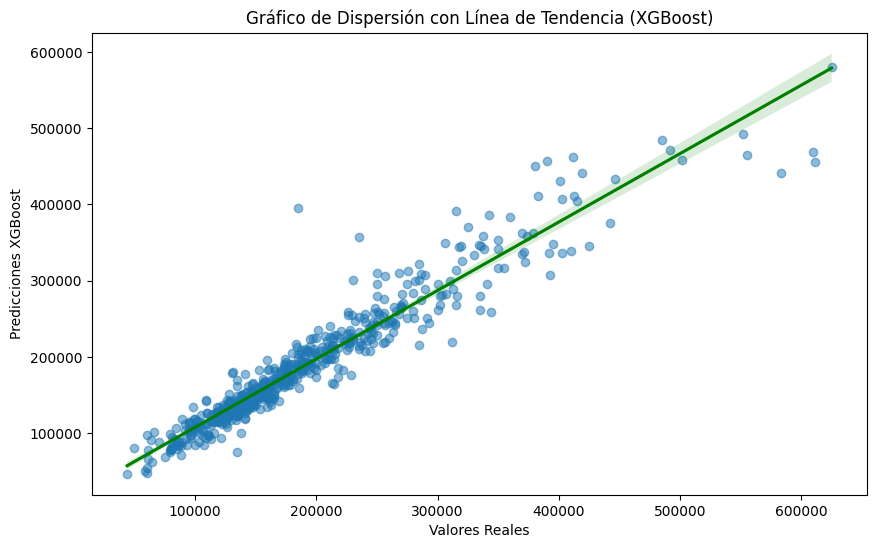

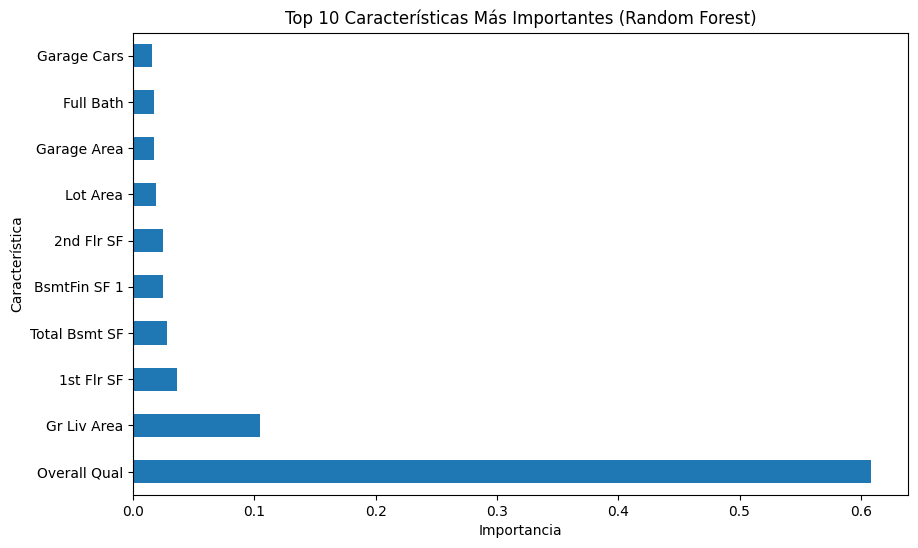

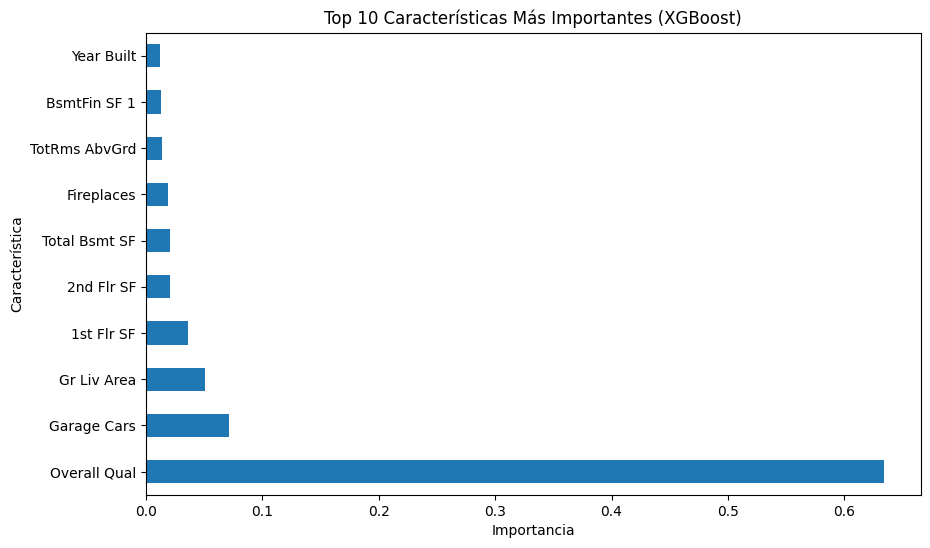

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Cargar los datos
df = pd.read_csv("/content/AmesHousing (1).csv")

# Ver información general
print("Información general del dataset:")
df.info()

# Análisis exploratorio
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], bins=50, kde=True, color='blue')
plt.title("Distribución de Precios de Casas")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar columnas con demasiados valores nulos
threshold = 0.5  # 50% de valores nulos como límite
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=cols_to_drop, inplace=True)

# Rellenar valores nulos restantes
df.fillna(df.median(numeric_only=True), inplace=True)

# Seleccionar variables numéricas relevantes
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove("SalePrice")  # Variable objetivo

# Separar variables predictoras y objetivo
X = df[numeric_features]
y = df["SalePrice"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación del modelo Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

# Entrenar modelo XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predicciones XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluación del modelo XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²: {r2_xgb:.2f}")

# Comparación de predicciones
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label="Valores Reales", linestyle='dashed', marker='o', markersize=4)
plt.plot(range(len(y_test)), y_pred_rf, label="Predicciones Random Forest", linestyle='solid', marker='s', markersize=3, alpha=0.7)
plt.plot(range(len(y_test)), y_pred_xgb, label="Predicciones XGBoost", linestyle='solid', marker='x', markersize=3, alpha=0.7)
plt.xlabel("Índice de muestra")
plt.ylabel("Precio de Venta")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.legend()
plt.show()

# Gráfico de dispersión con línea de tendencia (Random Forest)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones Random Forest")
plt.title("Gráfico de Dispersión con Línea de Tendencia (Random Forest)")
plt.show()

# Gráfico de dispersión con línea de tendencia (XGBoost)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_xgb, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones XGBoost")
plt.title("Gráfico de Dispersión con Línea de Tendencia (XGBoost)")
plt.show()

# Importancia de características (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=numeric_features)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Características Más Importantes (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# Importancia de características (XGBoost)
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=numeric_features)
feature_importances_xgb.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Características Más Importantes (XGBoost)")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()